# TASK 1: PROJECT OVERVIEW - THE AI LANDING PAGE GENERATOR

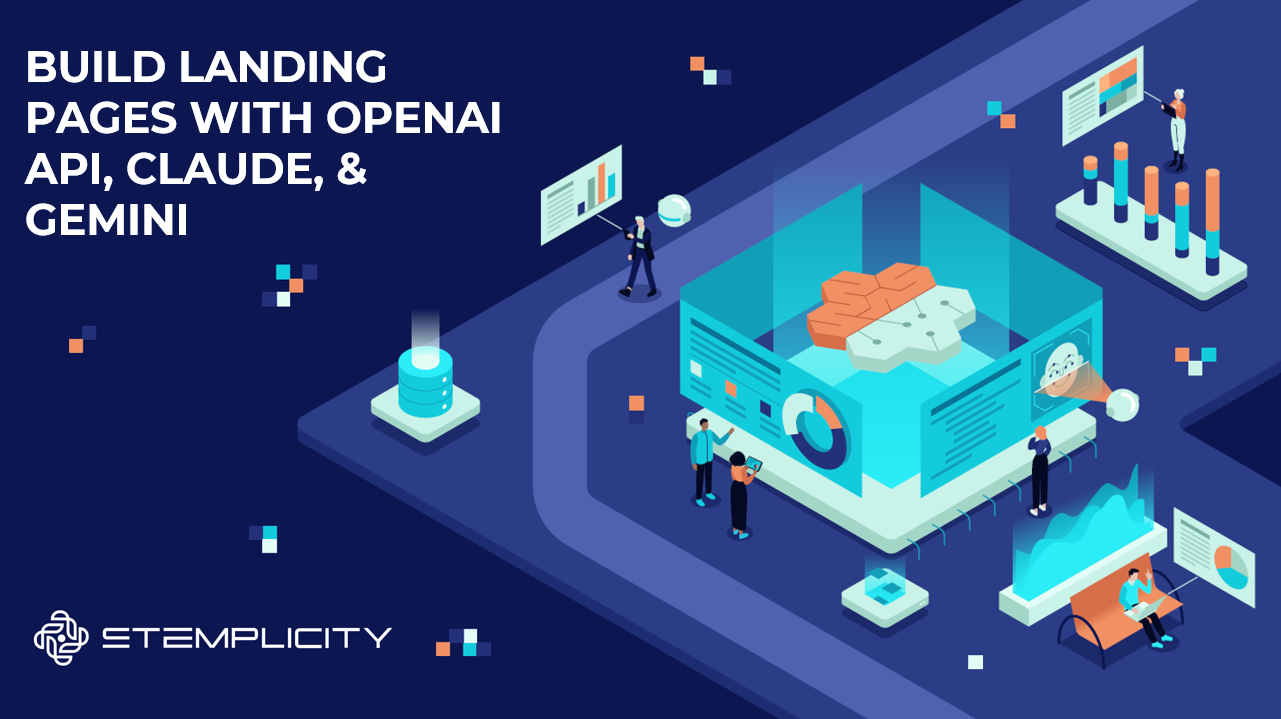

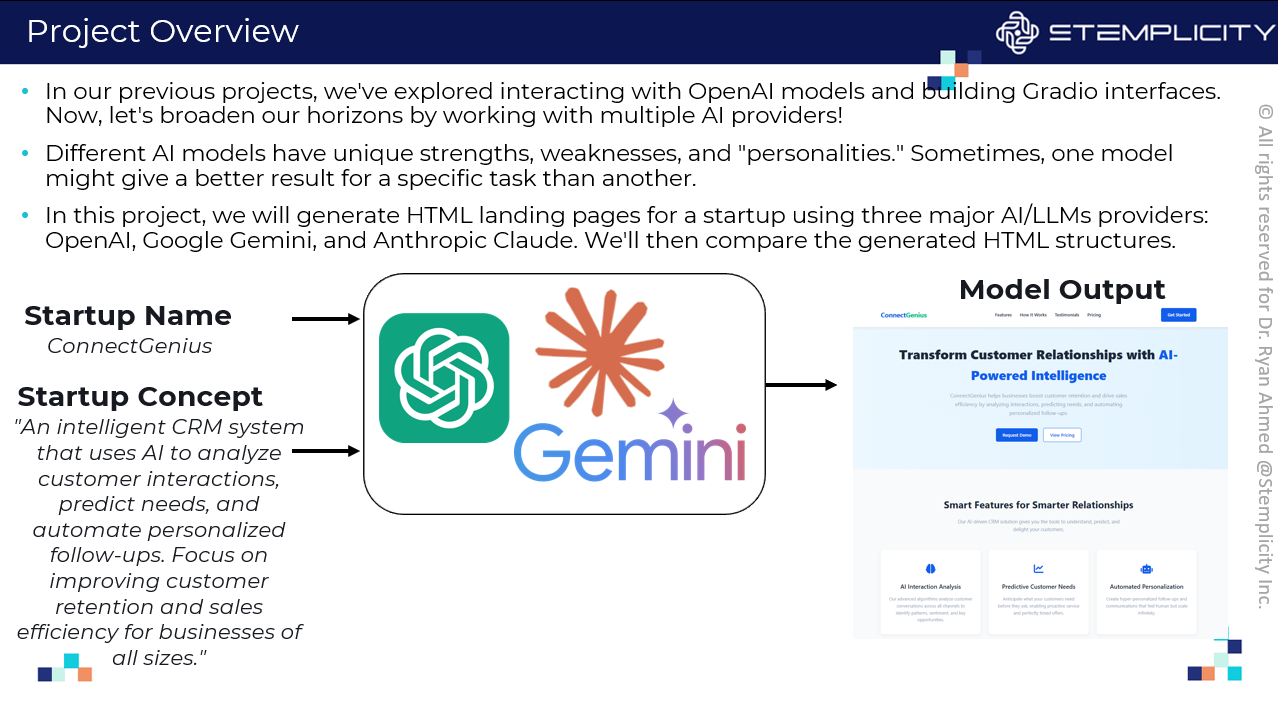

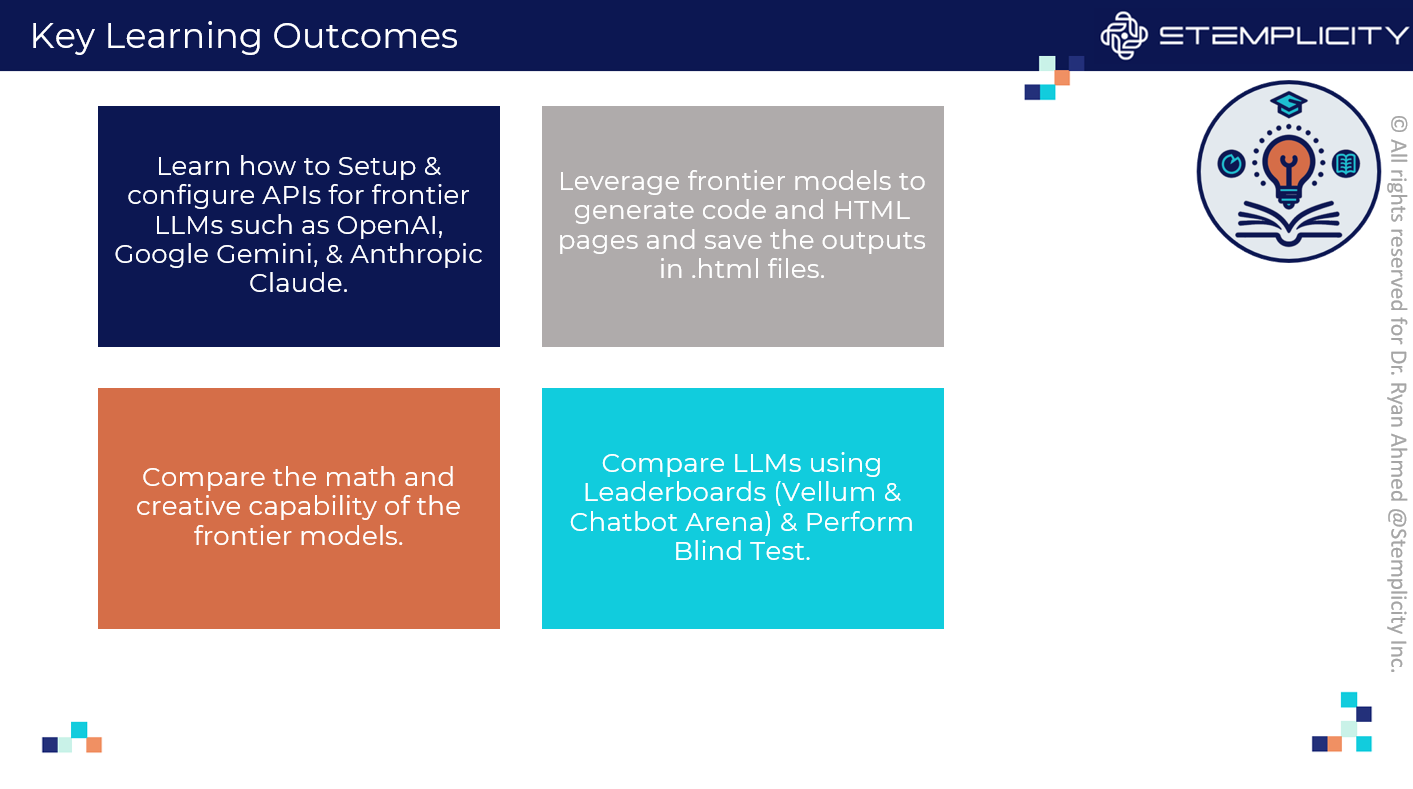

# TASK 2: LLM BENCHMARKS & LEADERBOARDS

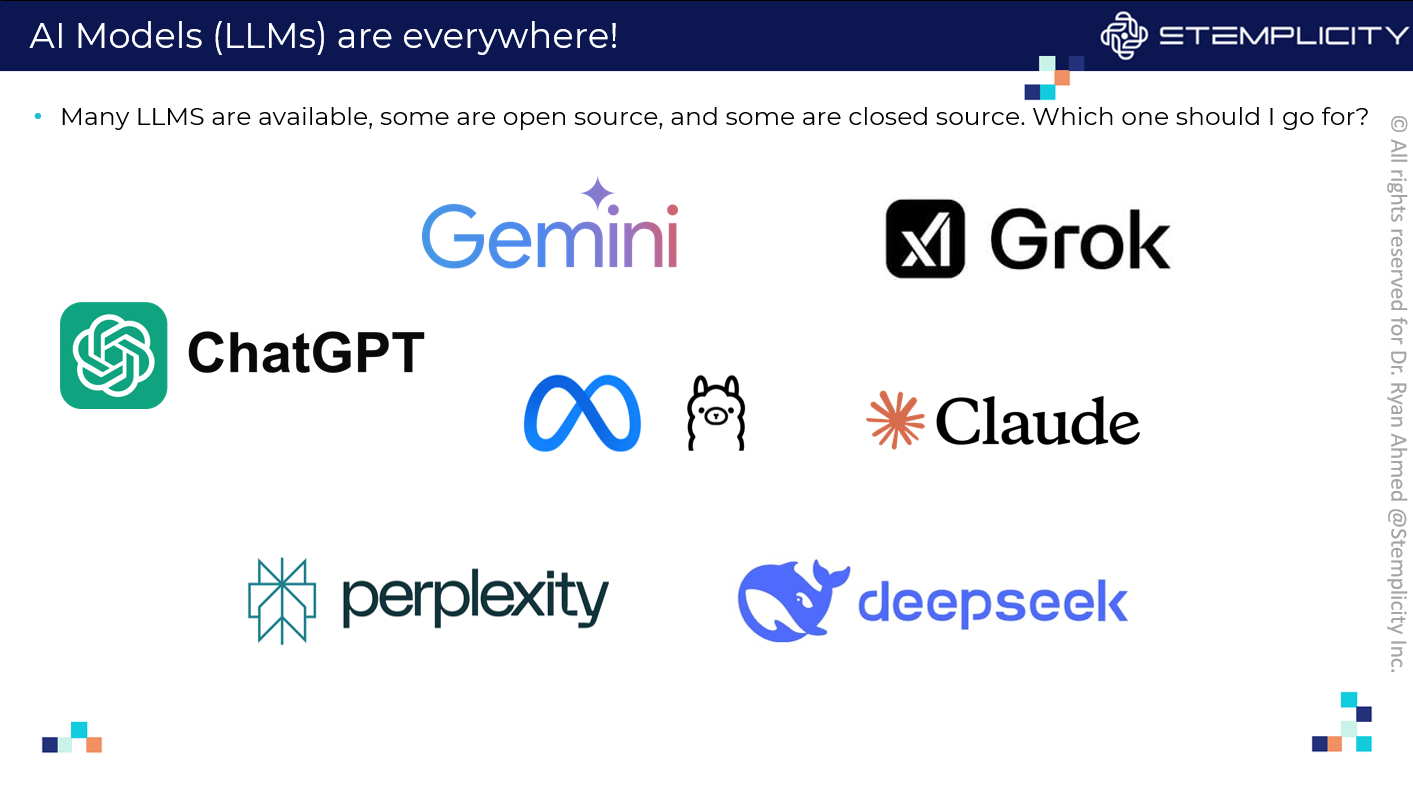

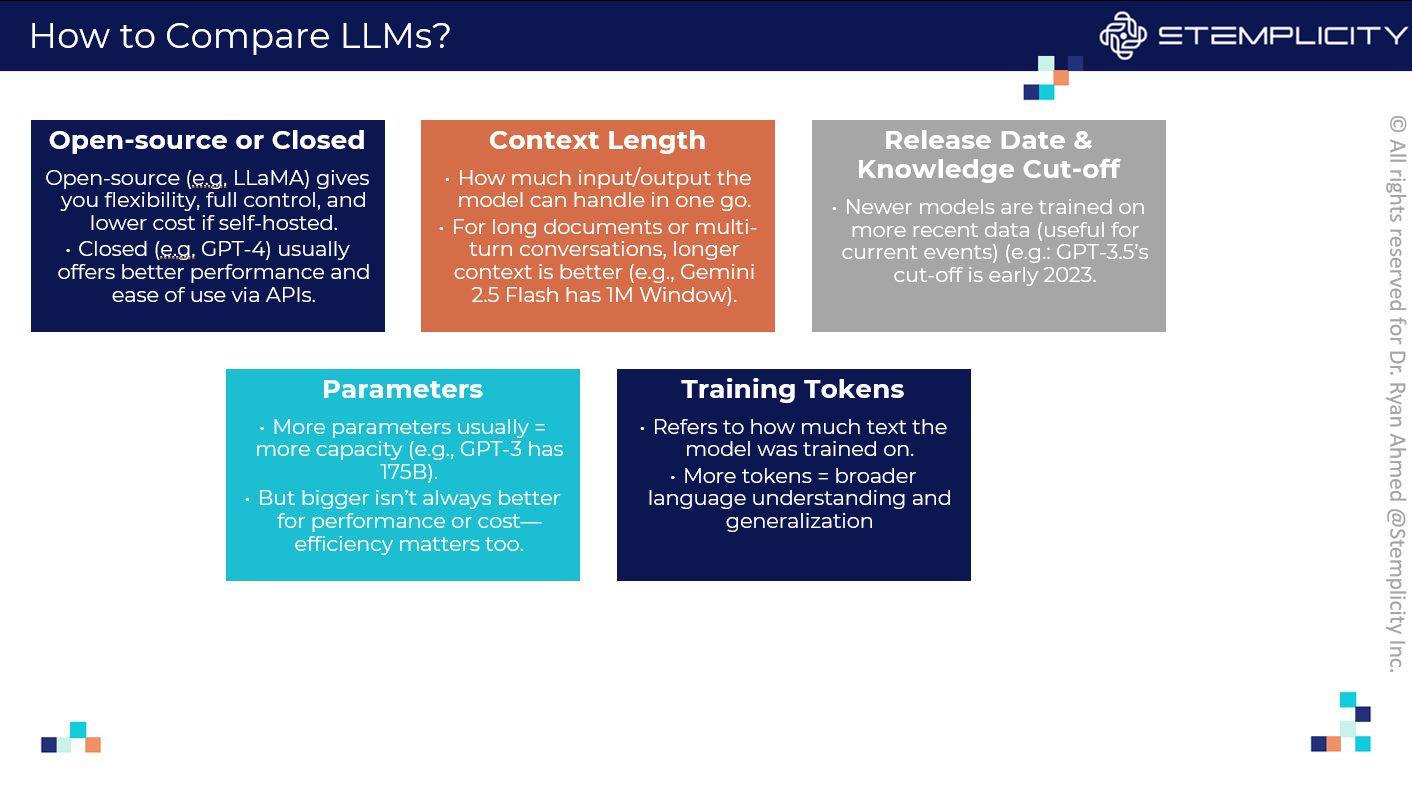

- **Vellum Leaderboard: https://www.vellum.ai/llm-leaderboard**


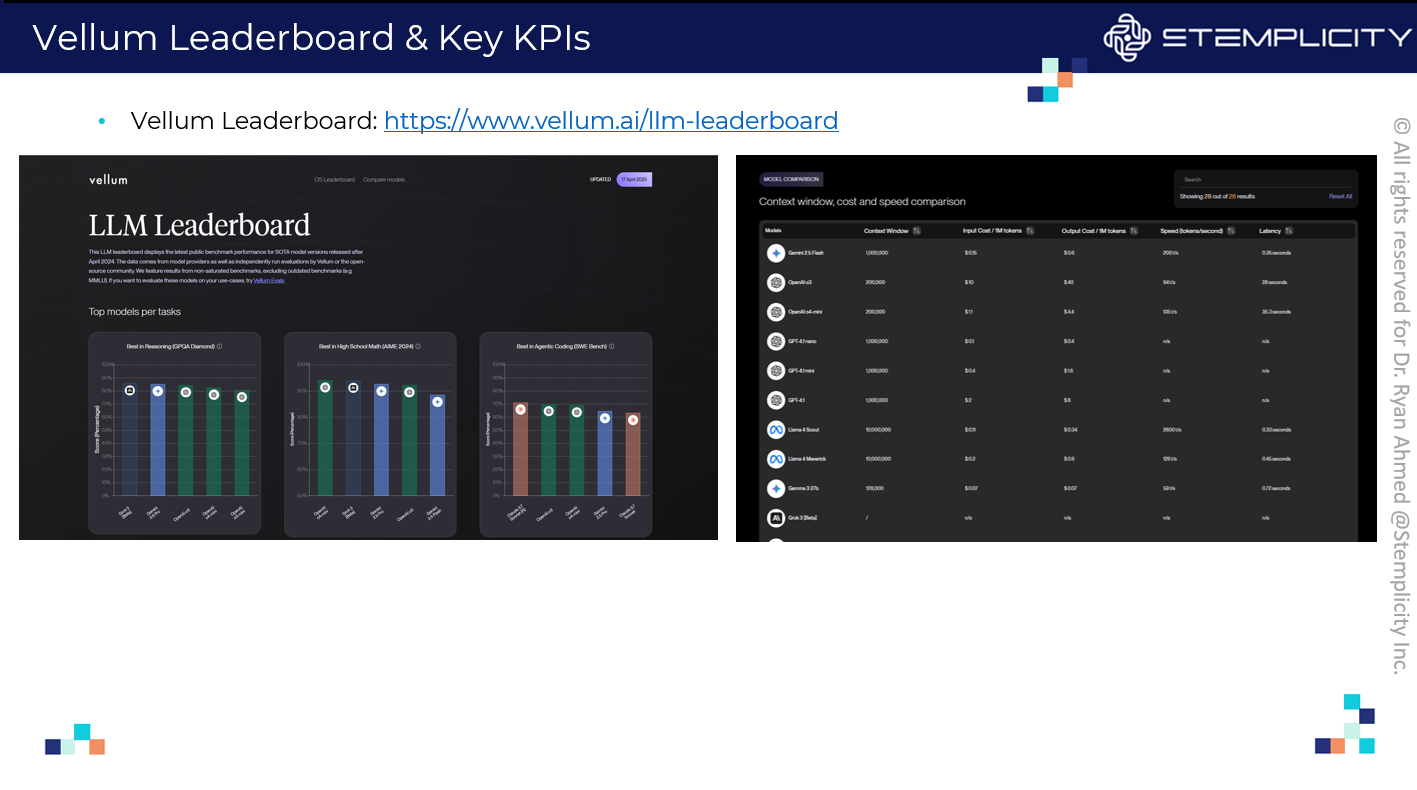

A fun and Scary thought:
- 2500 tokens per second means the model can read, process, or generate about 2500 words or parts of words every second. A "token" is usually about ¾ of a word on average (for English).
- 2500 tokens/second is roughly like reading or writing about 1800 full words every second.
- That means Llama models are very fast that they can generate almost an entire short essay in one second!

**PRACTICE OPPORTUNITY:**
- **Using Vellum, compare Google's Gemini 2.5 Pro model with Deepseek-R1 (or the latest version) based on latency, context window, cut-off date, and accuracy.**

# TASK 3: PERFROM BLIND TEST EVALUATION USING CHATBOT ARENA

- **Chatbot Arena (old): https://lmarena.ai/?leaderboard**
- **Chatbot Arena (New): https://beta.lmarena.ai/leaderboard**

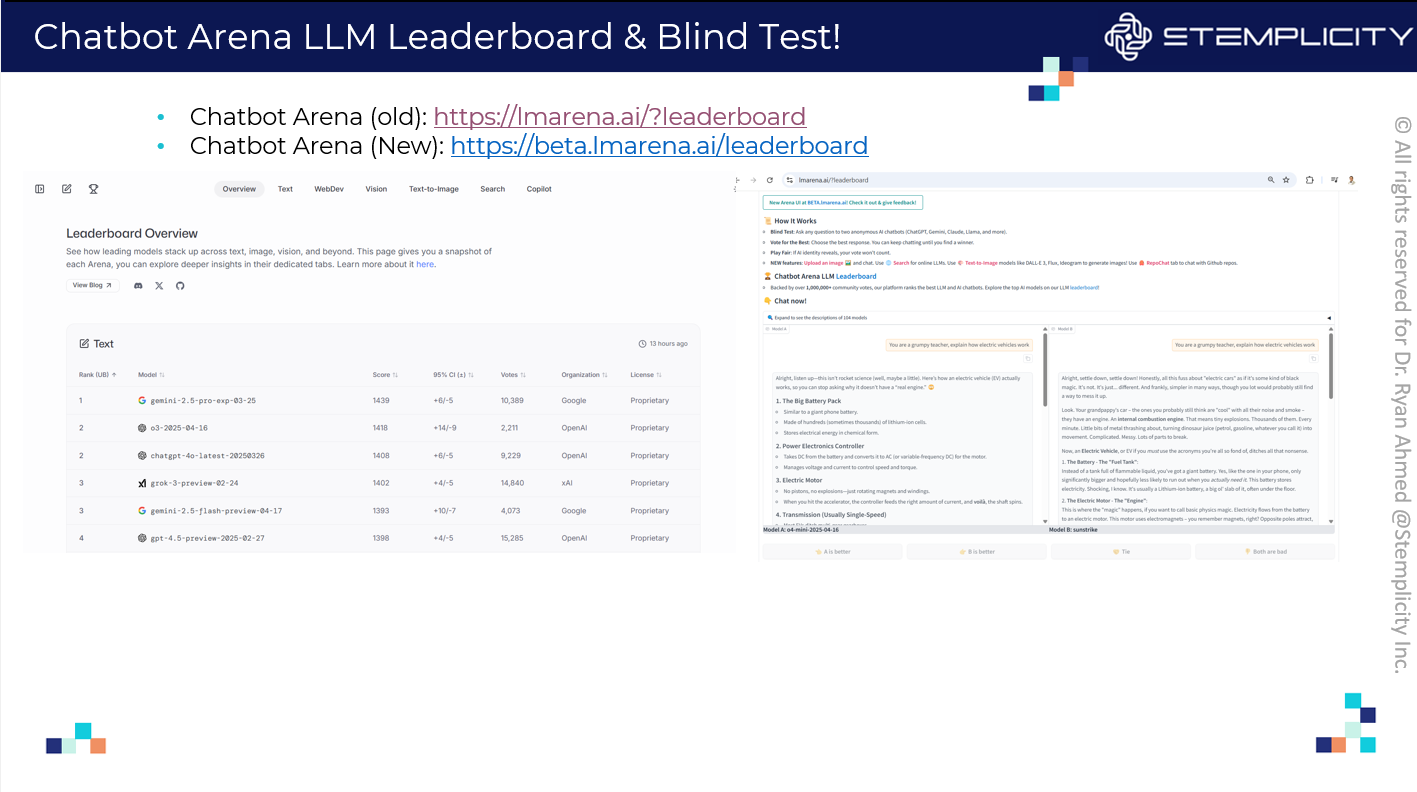

**PRACTICE OPPORTUNITY:**
- **In this practice opportunity, you will become an AI Judge by comparing blind responses from two AI models. Complete the following tasks:**
    - **1. Visit Chatbot Arena and start a blind test: https://beta.lmarena.ai/**
    - **2. Ask 3 questions that are technical, creative, and funny. For example:**
         - **Technical: "Explain how a blockchain works."**
         - **Creative: "Write a short, heartfelt poem for my mom Laila, for her 74th birthday (put your mom or significant other's name)"**
         - **Funny: "Tell me a joke that involves electric cars."**
    - **3. Decide: After each round, choose which bot provided the better answer based on clarity, creativity, and correctness. Enjoy the challenge and have fun discovering the unique strengths of each AI!**

# TASK 4: SETTING UP API KEYS & SIMPLE TESTING (OPENAI API, CLAUDE, & GEMINI)

To communicate with OpenAI, Google, and Anthropic, we need their respective API keys. You'll need to sign up on each platform and generate a key.

*   **OpenAI:** You likely already have this from previous projects. ( [https://platform.openai.com/api-keys](https://platform.openai.com/api-keys) )
*   **Google Gemini:** Get your key from Google AI Studio. ( [https://aistudio.google.com/app/apikey](https://aistudio.google.com/app/apikey) )
*   **Anthropic Claude:** Request access and generate a key from the Anthropic Console. ( [https://console.anthropic.com/](https://console.anthropic.com/) -> API Keys)

As before, store these keys securely in your `.env` file:

```dotenv
OPENAI_API_KEY=sk-YourOpenAIKey...
GOOGLE_API_KEY=YourGoogleGeminiKey...
ANTHROPIC_API_KEY=sk-ant-YourAnthropicKey...
```

Now, let's install the necessary libraries and load the keys.

In [ ]:
# Install necessary libraries
!pip install -q --upgrade openai python-dotenv gradio

In [ ]:
# Install new libraries that we haven't covered before `google-generativeai` and `anthropic` Python libraries.
!pip install google-generativeai anthropic

In [ ]:
# Import necessary libraries
import os
import warnings
from IPython.display import display, Markdown, HTML  # For displaying HTML directly
from dotenv import load_dotenv

# Import specific clients/modules for each provider
from openai import OpenAI
import google.generativeai as genai
from anthropic import Anthropic

# Load environment variables from the .env file
load_dotenv()
print("Attempting to load API keys from .env file...")

# Load Keys
openai_api_key = os.getenv("OPENAI_API_KEY")
google_api_key = os.getenv("GOOGLE_API_KEY")
anthropic_api_key = os.getenv("ANTHROPIC_API_KEY")

# Configure Clients

# OpenAI Client (Refresher)
openai_client = OpenAI(api_key = openai_api_key)
print(f"OpenAI Client configured (Key starts with: {openai_api_key[:5]}...).")

# Google Gemini Client
genai.configure(api_key = google_api_key)
gemini_model = genai.GenerativeModel("gemini-2.5-pro-exp-03-25")  # Most powerful model from Google
print(f"Google Gemini Client configured (Key starts with: {google_api_key[:5]}...). Model: gemini-2.5-pro-exp-03-25")

# Anthropic Claude Client
claude_client = Anthropic(api_key = anthropic_api_key)
print(f"Anthropic Claude Client configured (Key starts with: {anthropic_api_key[:7]}...).")



In [ ]:
# Helper function to display markdown nicely ---
def print_markdown(text):
    """Displays text as Markdown in Jupyter."""
    display(Markdown(text))


In [ ]:
def display_html_code(provider_name, html_content):
    """Displays generated HTML code block nicely."""
    print_markdown(f"### Generated HTML from {provider_name}:")
    # Display as a formatted code block
    display(Markdown(f"```html\n{html_content}\n```"))

In [ ]:
# Let's test the Math capabilities of these 3 LLMs
test_prompt = "A father is 36 years old, and his son is 6 years old. In how many years will the father be exactly five times as old as his son?"

In [ ]:
# Let's test their creativity!
test_prompt = "Write a funny Poem to my niece Rose for turning 1 year old!"

In [ ]:
# Let's test OpenAI API (we have done this many times already)
response = openai_client.chat.completions.create(model = "gpt-4o", 
                                                 messages = [{"role": "user", 
                                                              "content": test_prompt}],
                                                 temperature = 0.5)
print_markdown(response.choices[0].message.content)

In [ ]:
# Let's test Google Gemini Model
response = gemini_model.generate_content(test_prompt)
print_markdown(response.text)

In [ ]:
# Let's test the Claude Sonnet Model by Anthropic
response = claude_client.messages.create(model = "claude-3-7-sonnet-20250219",
        max_tokens = 20000,  # Set a max limit for the generated output
        messages = [{"role": "user", 
                   "content": test_prompt}])

# Extract the text content from the response object
print_markdown(response.content[0].text)

**PRACTICE OPPORTUNITY:**
- **Compare code generation ability of the 3 LLMs covered above (Claude Sonnet by Anthropic, gpt-4o by OpenAI, and gemini-2.0-flash by Google)**
- **Try something like:**
    - **test_prompt = "Build a function that calculates BMI. Let users choose between metric (kg/m) and imperial (lb/in) units."**

# TASK 5: DEFINING THE STARTUP IDEA & PROMPT

We need a consistent prompt to give each AI model. This prompt should clearly state:
1.  The **context** or personality we want the AI to take (e.g., You are an expert web developer).
2.  The **instruction**: generate HTML code for a landing page.
3.  The **output indicator** required: specifically, the full HTML structure for an `index.html` file.

Let's define our startup idea and the prompt.

In [ ]:
# Define the startup name and concept
startup_name = "ConnectGenius"
startup_concept = "An intelligent CRM system that uses AI to analyze customer interactions, predict needs, and automate personalized follow-ups. Focus on improving customer retention and sales efficiency for businesses of all sizes."

In [ ]:
# Define the core prompt for the LLMs
# We explicitly ask for HTML code and specify the file name 'index.html'
html_prompt = f"""
You are a helpful AI assistant acting as a front-end web developer.

Your task is to generate the complete HTML code for a simple, clean, and professional-looking landing page (index.html) for a new startup.

Startup Name: {startup_name}
Concept: {startup_concept}

Please generate ONLY the full HTML code, starting with <!DOCTYPE html> and ending with </html>.
Create a modern, visually appealing landing page with the following:

-- Don't include images in the code. Raw html code with inline css for styling.

1. A sleek header with the startup name in a bold, modern font and a compelling tagline
2. A hero section with a clear value proposition and call-to-action button
3. A features section highlighting 3-4 key benefits with icons or simple visuals
4. A "How it Works" section with numbered steps
5. A testimonials section with fictional customer quotes
6. A pricing section with at least two tiers
7. A professional footer with navigation links and social media icons

Use inline CSS for styling with a modern color palette (primary, secondary, and accent colors). 
Include responsive design elements, subtle animations, and whitespace for readability.
Emphasize AI capabilities, ease of use, and business benefits throughout the copy.
Focus on conversion-optimized marketing messages that highlight pain points and solutions.

Do not include any explanations before or after the code block. Just provide the raw HTML code.
"""

print_markdown("**Core Prompt defined for the LLMs:**")
print_markdown(f"> {html_prompt}")  # Print the start of the prompt to verify

**PRACTICE OPPORTUNITY:**
- **Change the `startup_name` and `startup_concept` variables in the code cell above to describe a different fictional startup (e.g., "AI Recipe Chef" or "Personalized Fitness Planner".**
- **Rerun the code cell to update the `html_prompt` variable with your new idea.**
- **Read the updated `html_prompt` to ensure your changes are reflected. This new prompt will be used in the following steps.**

# TASK 6: GENERATE HTML LANDING PAGES WITH OPENAI

Let's start with OpenAI, which we're already familiar with.

We will:
1.  Call the `chat.completions.create` method.
2.  Use our `html_prompt` as the user message.
3.  Extract the generated HTML content.
4.  Display the generated code.
5.  **NEW:** Save the content to a file named `openai_landing_page.html`.


In [ ]:
# Let's generate HTML using OpenAI API, we will use gpt-4o model

openai_html_output = "<!-- OpenAI generation not run or failed -->"  # Default message

print_markdown("## Calling OpenAI API...")
try:
    response = openai_client.chat.completions.create(
        model = "gpt-4o",  # A capable and fast model suitable for this task
        messages = [
            # No system prompt needed here as instructions are in the user prompt
            {"role": "user", "content": html_prompt}
        ],
        temperature = 0.5,  # A bit deterministic for code generation
    )
    openai_html_output = response.choices[0].message.content

    # Sometimes OpenAI might wrap the code in markdown fences
    # Let's try to strip that if present
    if openai_html_output.strip().startswith("```html"):
        lines = openai_html_output.strip().splitlines()
        openai_html_output = "\n".join(lines[1:-1]).strip()
    else:
        openai_html_output = openai_html_output.strip()

    # Display the generated HTML code
    display_html_code("OpenAI (gpt-4o)", openai_html_output)

    # Let's Save the output to a file
    file_path = "openai_landing_page.html"

    with open(file_path, "w", encoding="utf-8") as f:
        f.write(openai_html_output)
    print_markdown(f"Successfully saved OpenAI output to `{file_path}`")


except Exception as e:
    print_markdown(f"Error calling OpenAI API: {e}")
    openai_html_output = f"<!-- Error calling OpenAI API: {e} -->"

**PRACTICE OPPORTUNITY:**
- **In the code cell above, change the `model` parameter in the `openai_client.chat.completions.create` call from `"gpt-4o"` to a different OpenAI model you have access to (e.g., `"gpt-4o-mini"`).**
- **Rerun the cell and observe the generated HTML code. Is it significantly different?**
- **Check the saved `openai_landing_page.html` file to ensure it was updated. (You might need to refresh your file browser).**

# TASK 7: GENERATE HTML LANDING PAGES WITH GOOGLE GEMINI

Now, let's do the same task using Google Gemini. Notice the slight difference in how we call the API using the `google-generativeai` library.

We will:
1.  Call the `generate_content` method on our configured `gemini_model`.
2.  Pass the `html_prompt`.
3.  Extract the generated text (Gemini's response object has a `.text` attribute).
4.  Display the generated code.
5.  Save the content to `gemini_landing_page.html`.

In [ ]:
gemini_html_output = "<!-- Gemini generation not run or failed -->"  # Default message

print_markdown("## Calling Google Gemini API...")
try:
    # Gemini API call structure
    response = gemini_model.generate_content(
        html_prompt,
    )

    # Extract the text content
    # Sometimes, Gemini might wrap the code in markdown ```html ... ```
    # Let's try to strip that if present
    raw_output = response.text
    if raw_output.strip().startswith("```html"):
        # Remove the first line (```html) and the last line (```)
        lines = raw_output.strip().splitlines()
        gemini_html_output = "\n".join(lines[1:-1]).strip()
    else:
        gemini_html_output = raw_output.strip()  # Assume it's raw HTML if no markdown fences

    # Display the generated HTML code
    display_html_code("Google Gemini (gemini-2.0-flash)", gemini_html_output)

    # --- Save the output to a file ---
    file_path = "gemini_landing_page.html"

    with open(file_path, "w", encoding="utf-8") as f:
        f.write(gemini_html_output)
    print_markdown(f"Successfully saved Gemini output to `{file_path}`")


except Exception as e:
    print_markdown(f"Error calling Google Gemini API: {e}")
    # More detailed error handling for Gemini if needed
    gemini_html_output = f"<!-- Error calling Google Gemini API: {e} -->"


**PRACTICE OPPORTUNITY:**
- **Look closely at the raw HTML code generated by Gemini in the output above (or in the `gemini_landing_page.html` file).**
- **Compare it to the structure generated by OpenAI (from the previous task).**
- **Use Google Gemini model to generate an HTML page using a different startup and vision (e.g.: Quantum computing startup)**

# TASK 8: GENERATE HTML LANDING PAGES WITH ANTHROPIC CLAUDE

Finally, let's use Anthropic's Claude. Again, note the API call structure is unique to this provider. We'll use a Claude 3 model like Sonnet or Haiku.

We will:
1.  Call the `messages.create` method on the `claude_client`.
2.  Specify the `model` we want to use (e.g., `claude-3-7-sonnet-20250219`). (Most powerful model from Anthropic)
3.  Provide the prompt within the `messages` list. Claude often works well with a system prompt too, although our main instructions are in the user message here.
4.  Extract the content from the response (it's usually within `response.content[0].text`).
5.  Display the generated code.
6.  Save the content to `claude_landing_page.html`.

In [ ]:
# Generate HTML using Anthropic Claude

claude_html_output = "<!-- Claude generation not run or failed -->"  # Default message

print_markdown("## Calling Anthropic Claude API...")

claude_model_name = "claude-3-7-sonnet-20250219"
print_markdown(f"(Using model: {claude_model_name})")

try:
    response = claude_client.messages.create(
        model = claude_model_name,
        max_tokens = 20000,  # Set a max limit for the generated output
        # System prompt can sometimes help guide Claude's persona/role
        # system="You are a front-end web developer generating HTML code.",
        messages = [{"role": "user", "content": html_prompt}],
    )

    # Extract the text content from the response object
    raw_output = response.content[0].text
    if raw_output.strip().startswith("```html"):
        lines = raw_output.strip().splitlines()
        claude_html_output = "\n".join(lines[1:-1]).strip()
    else:
        claude_html_output = raw_output.strip()

    # Display the generated HTML code
    display_html_code(f"Anthropic Claude ({claude_model_name})", claude_html_output)

    # --- Save the output to a file ---
    file_path = "claude_landing_page.html"

    with open(file_path, "w", encoding="utf-8") as f:
        f.write(claude_html_output)
    print_markdown(f"Successfully saved Claude output to `{file_path}`")

except Exception as e:
    print_markdown(f"Error calling Anthropic Claude API: {e}")
    claude_html_output = f"<!-- Error calling Anthropic Claude API: {e} -->"

**PRACTICE OPPORTUNITY:**
- **Modify the prompt to include a `contact/sign-up` form with colors that catch attention, feel free to get creative!**
- **Rerun all three models and open the saved files (`openai_landing_page.html`, `gemini_landing_page.html`, `claude_landing_page.html`) in a text editor and compare the code structure from all three providers for the *same* startup prompt.**
- **Which provider do you think generated the cleanest, most semantic HTML structure based purely on reading the code? Which one seemed to follow the instructions most closely? There's no single right answer, it's subjective and depends on the run!**

# PRACTICE OPPORTUNITY SOLUTIONS

**PRACTICE OPPORTUNITY SOLUTION:**
- **Using Vellum, compare the Google Gemini 2.5 Pro model with Deepseek-R1 (or the latest version) based on latency, context window, cut-off date, and accuracy.**

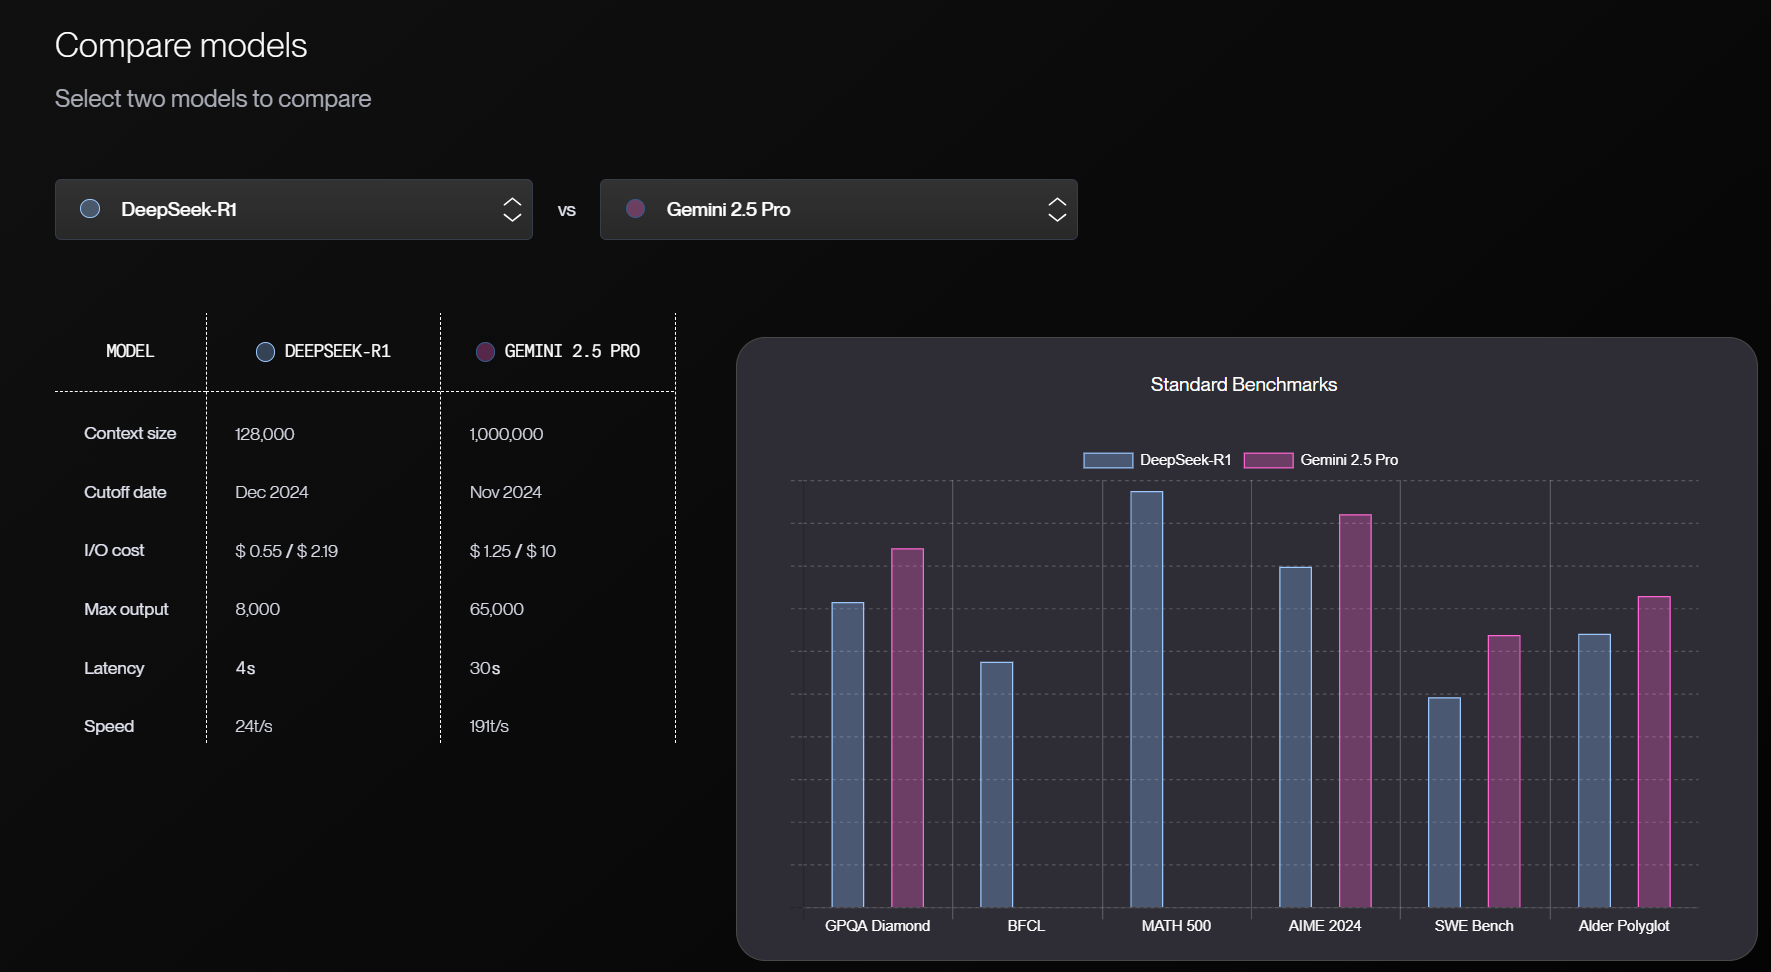

**PRACTICE OPPORTUNITY SOLUTION:**
- **In this practice opportunity, you will become an AI Judge by comparing blind responses from two AI models. Complete the following tasks:**
    - **1. Visit Chatbot Arena and start a blind test: https://beta.lmarena.ai/**
    - **2. Ask a 3 questions that are technical, creative, and funny. For example:**
         - **Technical: "Explain how a blockchain works."**
         - **Creative: "Write a short, heartfelt poem for my mom Laila, for her 74th birthday (put your mom or signifant other's name)"**
         - **Funny: "Tell me a joke that involves electric cars."**
    - **3. Decide: After each round, choose which bot provided the better answer based on clarity, creativity, and correctness. Enjoy the challenge and have fun discovering the unique strengths of each AI!**

In [ ]:
# Test all models and perform a blind assessment - watch the course video!

**PRACTICE OPPORTUNITY SOLUTION:**
- **Compare code generation ability of the 3 LLMs covered above (Claude Sonnet by Anthropic, gpt-4o by OpenAI, and gemini-2.0-flash by Google)**
- **Try something like:**
    - **test_prompt = "Build a function that calculates BMI. Let users choose between metric (kg/m) and imperial (lb/in) units."**

In [ ]:
test_prompt = "Build a function in Python that calculates BMI. Let users choose between metric (kg/m) and imperial (lb/in) units."

In [ ]:
# Let's test OpenAI API (we have done this many times already)
response = openai_client.chat.completions.create(model = "gpt-4o", 
                                                 messages = [{"role": "user", 
                                                              "content": test_prompt}],
                                                 temperature = 0.5)
print_markdown(response.choices[0].message.content)

In [ ]:
# Let's test the Claude Sonnet Model by Anthropic
response = claude_client.messages.create(model = "claude-3-7-sonnet-20250219",
        max_tokens = 20000,  # Set a max limit for the generated output
        messages=[{"role": "user", 
                   "content": test_prompt}])

# Extract the text content from the response object
print_markdown(response.content[0].text)

In [ ]:
# Let's test Google Gemini Model
response = gemini_model.generate_content(test_prompt)
print_markdown(response.text)

**PRACTICE OPPORTUNITY SOLUTION:**
- **Change the `startup_name` and `startup_concept` variables in the code cell above to describe a different fictional startup (e.g., "AI Recipe Chef" or "Personalized Fitness Planner".**
- **Rerun the code cell to update the `html_prompt` variable with your new idea.**
- **Read the updated `html_prompt` to ensure your changes are reflected. This new prompt will be used in the following steps.**

In [ ]:
# Define the fictional startup idea (Example Modification)
startup_name = "Quantum Leap Computing"
startup_concept = "A cloud platform providing affordable access to quantum computing resources for researchers and small businesses. Focus on a user-friendly interface and educational materials."

# Define the core prompt again to capture changes (This part is already in Task 3 cell)
html_prompt = f"""
You are a helpful AI assistant acting as a front-end web developer.

Your task is to generate the complete HTML code for a simple, clean, and professional-looking landing page (index.html) for a new startup.

Startup Name: {startup_name}
Concept: {startup_concept}

Please generate ONLY the full HTML code, starting with <!DOCTYPE html> and ending with </html>.
Create a modern, visually appealing landing page with the following:

1. A sleek header with the startup name in a bold, modern font and a compelling tagline
2. A hero section with a clear value proposition and call-to-action button
3. A features section highlighting 3-4 key benefits with icons or simple visuals
4. A "How it Works" section with numbered steps
5. A testimonials section with fictional customer quotes
6. A pricing section with at least two tiers
7. A professional footer with navigation links and social media icons

Use inline CSS for styling with a modern color palette (primary, secondary, and accent colors). 
Include responsive design elements, subtle animations, and whitespace for readability.
Emphasize AI capabilities, ease of use, and business benefits throughout the copy.
Focus on conversion-optimized marketing messages that highlight pain points and solutions.

Do not include any explanations before or after the code block. Just provide the raw HTML code.
"""

print_markdown("**Core Prompt UPDATED for the LLMs (Practice Opportunity Example):**")
print_markdown(f"> {html_prompt[:500]}...")  # This line in Task 3 confirms the change

**PRACTICE OPPORTUNITY SOLUTION:**
- **In the code cell above, change the `model` parameter in the `openai_client.chat.completions.create` call from `"gpt-4o"` to a different OpenAI model you have access to (e.g., `"gpt-4o-mini"`).**
- **Rerun the cell and observe the generated HTML code. Is it significantly different?**
- **Check the saved `openai_landing_page.html` file to ensure it was updated. (You might need to refresh your file browser).**

In [ ]:
# Generate HTML using OpenAI

openai_html_output = "<!-- OpenAI generation not run or failed -->"  # Default message


try:
    response = openai_client.chat.completions.create(
        # model="gpt-4o", # Original model
        model = "gpt-4o-mini",  # <<< MODIFIED for the practice opportunity
        messages = [{"role": "user", "content": html_prompt}],
        temperature = 0.5,
    )
    openai_html_output = response.choices[0].message.content

    # Display the generated HTML code
    display_html_code("OpenAI (gpt-4o - Practice 2)", openai_html_output)

    # --- Save the output to a file ---
    file_path = "openai_landing_page_practice_opportunity.html"  # Save to a different file to compare
    try:
        with open(file_path, "w", encoding="utf-8") as f:
            f.write(openai_html_output)
        print_markdown(f"Successfully saved OpenAI output (Practice Opportunity) to `{file_path}`")
    except Exception as e:
        print_md(f"Error saving file: {e}")

except Exception as e:
    print_mardown(f"Error calling OpenAI API: {e}")
    openai_html_output = f"<!-- Error calling OpenAI API: {e} -->"


**PRACTICE OPPORTUNITY SOLUTION:**
- **Look closely at the raw HTML code generated by Gemini in the output above (or in the `gemini_landing_page.html` file).**
- **Compare it to the structure generated by OpenAI (from the previous task).**
- **Use Google Gemini model to generate an HTML page using a different startup and vision (e.g.: Quantum computing startup**

In [ ]:
# Rerun the cell with the new startup name! 

**PRACTICE OPPORTUNITY SOLUTION:**
- **Modify the prompt to include a `contact/sign-up` form with colors that catch attention, feel free to get creative!**
- **Rerun all three models and open the saved files (`openai_landing_page.html`, `gemini_landing_page.html`, `claude_landing_page.html`) in a text editor and compare the code structure from all three providers for the *same* startup prompt.**
- **Which provider do you think generated the cleanest, most semantic HTML structure based purely on reading the code? Which one seemed to follow the instructions most closely? There's no single right answer, it's subjective and depends on the run!**

In [ ]:
# Define the startup name and concept
startup_name = "ConnectGenius"
startup_concept = "An intelligent CRM system that uses AI to analyze customer interactions, predict needs, and automate personalized follow-ups. Focus on improving customer retention and sales efficiency for businesses of all sizes."

In [ ]:
# Define the core prompt with an added feature request
html_prompt = f"""
You are a helpful AI assistant acting as a front-end web developer.

Your task is to generate the complete HTML code for a simple, clean, and professional-looking landing page (index.html) for a new startup.

Startup Name: {startup_name}
Concept: {startup_concept}

Please generate ONLY the full HTML code, starting with <!DOCTYPE html> and ending with </html>.
Create a modern, visually appealing landing page with the following:

1. A sleek header with the startup name in a bold, modern font and a compelling tagline
2. A hero section with a clear value proposition and call-to-action button
3. A features section highlighting 3-4 key benefits with icons or simple visuals
4. A "How it Works" section with numbered steps
5. A testimonials section with fictional customer quotes
6. A pricing section with at least two tiers
7. A contact/sign-up form with red color to grab people attention
8. A professional footer with navigation links and social media icons

Use inline CSS for styling with a modern color palette (primary, secondary, and accent colors). 
Include responsive design elements, subtle animations, and whitespace for readability.
Emphasize AI capabilities, ease of use, and business benefits throughout the copy.
Focus on conversion-optimized marketing messages that highlight pain points and solutions.

Do not include any explanations before or after the code block. Just provide the raw HTML code.
"""

print_markdown("**Core Prompt UPDATED with Contact Form Request (for practice opportunity):**")
print_markdown(f"> {html_prompt[:250]}...")  # Verify the prompt modification

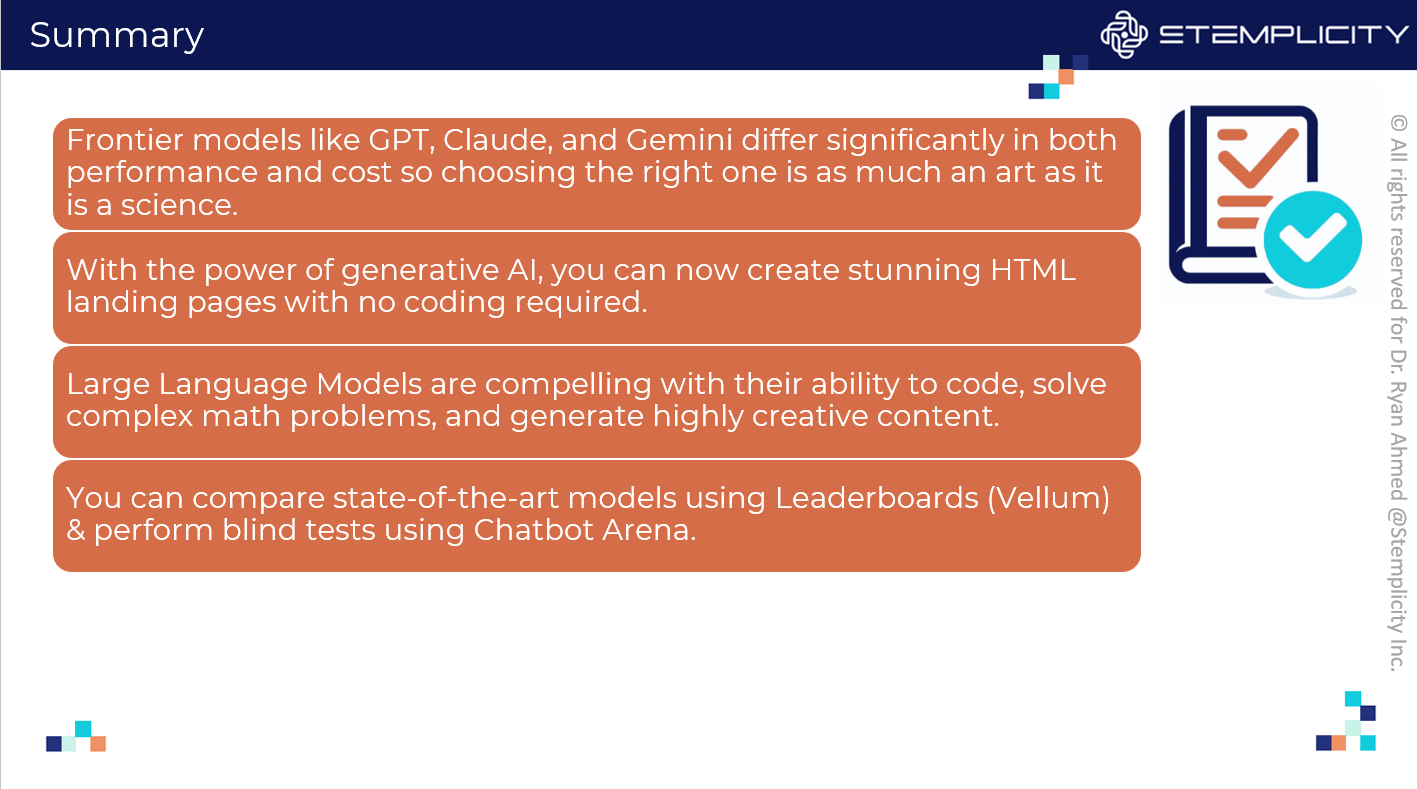

- **Would love to connect with everyone on LinkedIn: www.linkedin.com/in/dr-ryan-ahmed**

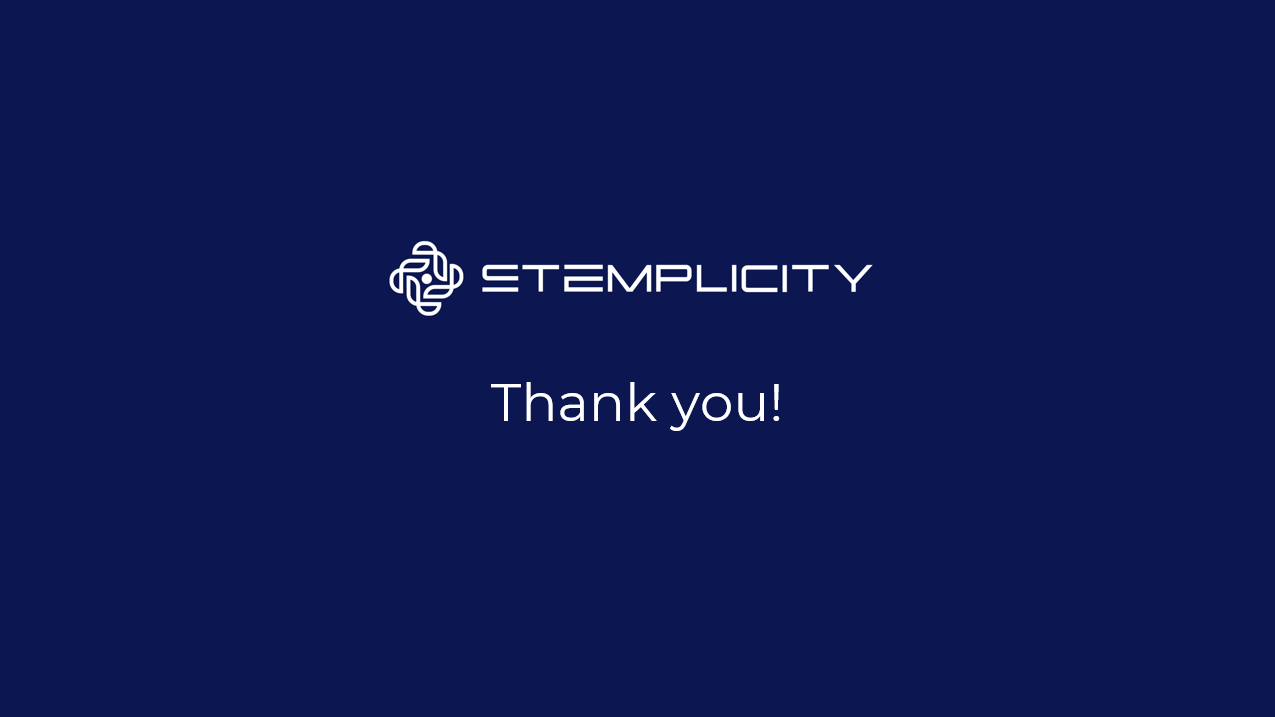